# Практика 12

Используете lstm для предсказания.
Датасет - или тот, который вы подобрали для проекта.
или другой time series с kaggle.
Например:
https://www.kaggle.com/datasets/boyangs444/process-data-for-predictive-maintenance

In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_14660\195935184.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('manual_30min_norm.csv')

In [4]:
data.head()

,TIME,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
0,16/09/2013 00:00,1.000000,0.538462,0.538462,0.123077,0.123077,0.142857,1379289600
1,16/09/2013 00:30,0.999475,0.538416,0.538416,0.123077,0.122985,0.143787,1379291400
2,16/09/2013 01:00,0.998950,0.538370,0.538370,0.123077,0.122894,0.144717,1379293200
3,16/09/2013 01:30,0.998424,0.538324,0.538324,0.123077,0.122802,0.145647,1379295000
4,16/09/2013 02:00,0.997899,0.538278,0.538278,0.123077,0.122711,0.146577,1379296800


In [5]:
data.describe()

,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
count,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,1.106410e+05
mean,0.468309,0.561586,0.585491,0.524408,0.399311,0.396514,1.478866e+09
std,0.258924,0.059871,0.040076,0.125889,0.125387,0.080811,5.749101e+07
min,0.000000,0.461538,0.138462,0.123077,0.000000,0.000000,1.379290e+09
25%,0.264587,0.511218,0.553846,0.553846,0.373054,0.368676,1.429078e+09
50%,0.410539,0.534982,0.600000,0.568292,0.439034,0.383929,1.478866e+09
75%,0.631303,0.615385,0.615385,0.584615,0.476923,0.405506,1.528654e+09
max,1.000000,1.000000,0.646154,0.676923,0.615385,1.000000,1.578442e+09


In [6]:
data['TIME'] = (pd.to_datetime(data['TIME']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14660\4103890947.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['TIME'] = (pd.to_datetime(data['TIME']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,TIME,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
0,1379289600,1.000000,0.538462,0.538462,0.123077,0.123077,0.142857,1379289600
1,1379291400,0.999475,0.538416,0.538416,0.123077,0.122985,0.143787,1379291400
2,1379293200,0.998950,0.538370,0.538370,0.123077,0.122894,0.144717,1379293200
3,1379295000,0.998424,0.538324,0.538324,0.123077,0.122802,0.145647,1379295000
4,1379296800,0.997899,0.538278,0.538278,0.123077,0.122711,0.146577,1379296800


In [7]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into train and test sets
train_length = int(len(scaled_data) * 0.7)
train_X, train_y = scaled_data[:train_length, 1:], scaled_data[:train_length, 0]
test_X, test_y = scaled_data[train_length:, 1:], scaled_data[train_length:, 0]

# Create an LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_X, train_y, epochs=20, batch_size=1, verbose=2)

# Make predictions
predictions = model.predict(test_X)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
77448/77448 - 158s - 2ms/step - loss: 1.7839e-04
Epoch 2/20
77448/77448 - 161s - 2ms/step - loss: 4.0027e-06
Epoch 3/20
77448/77448 - 167s - 2ms/step - loss: 2.2071e-06
Epoch 4/20
77448/77448 - 164s - 2ms/step - loss: 1.5863e-06
Epoch 5/20
77448/77448 - 157s - 2ms/step - loss: 1.3000e-06
Epoch 6/20
77448/77448 - 159s - 2ms/step - loss: 1.1654e-06
Epoch 7/20
77448/77448 - 159s - 2ms/step - loss: 1.1050e-06
Epoch 8/20
77448/77448 - 172s - 2ms/step - loss: 1.0612e-06
Epoch 9/20
77448/77448 - 196s - 3ms/step - loss: 9.5556e-07
Epoch 10/20
77448/77448 - 192s - 2ms/step - loss: 9.0036e-07
Epoch 11/20
77448/77448 - 170s - 2ms/step - loss: 8.1006e-07
Epoch 12/20
77448/77448 - 172s - 2ms/step - loss: 8.4185e-07
Epoch 13/20
77448/77448 - 171s - 2ms/step - loss: 7.4624e-07
Epoch 14/20
77448/77448 - 157s - 2ms/step - loss: 7.2330e-07
Epoch 15/20
77448/77448 - 145s - 2ms/step - loss: 7.0995e-07
Epoch 16/20
77448/77448 - 147s - 2ms/step - loss: 6.4270e-07
Epoch 17/20
77448/77448 - 148s - 

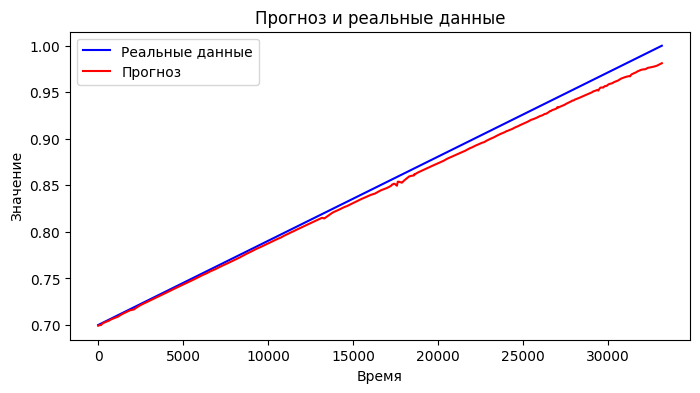

In [8]:
# Визуализация результатов
plt.figure(figsize=(8,4))
plt.plot(test_y, color='blue', label='Реальные данные')
plt.plot(predictions, color='red', label='Прогноз')
plt.title('Прогноз и реальные данные')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()